In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
boa=pd.read_csv('/content/drive/MyDrive/boa1.csv',index_col='date')
snd=pd.read_csv('/content/drive/MyDrive/snd1.csv',index_col='date')
ttl=pd.read_csv('/content/drive/MyDrive/ttl1.csv',index_col='date')
mng=pd.read_csv('/content/drive/MyDrive/mng1.csv',index_col='date')

In [5]:
boa.index=pd.to_datetime(boa.index ,format='%d/%m/%Y')
snd.index=pd.to_datetime(snd.index ,format='%d/%m/%Y')
ttl.index=pd.to_datetime(ttl.index ,format='%d/%m/%Y')
mng.index=pd.to_datetime(mng.index ,format='%d/%m/%Y')

In [6]:
boa

,Value,Low,High,Variation (%),Volume
date,,,,,
2022-05-20,193.0,193.00,196.50,-1.03,26550
2022-05-19,195.0,192.00,197.00,0.00,1747
2022-05-18,195.0,195.00,195.00,0.00,1005
2022-05-17,195.0,195.00,199.95,-1.52,1160
2022-05-16,198.0,195.00,198.00,0.13,38
...,...,...,...,...,...
2020-01-08,190.0,186.15,190.00,-1.04,3430
2020-01-07,192.0,192.00,192.00,0.00,1
2020-01-06,192.0,192.00,192.00,0.00,1


In [ ]:
boa=boa.sort_values(by=['date'] , ascending=True)

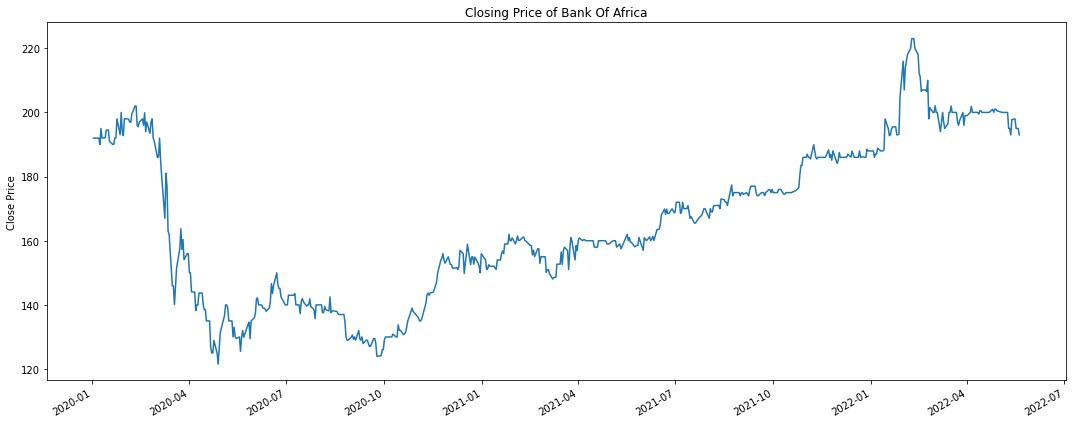

In [9]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)
# plt.subplot(2, 2)
boa['Value'].plot()
plt.ylabel('Close Price')
plt.xlabel(None)
plt.title("Closing Price of Bank Of Africa")
plt.tight_layout()


In [10]:
# Get the stock quote
df = boa[['Value',	'Low',	'High',	'Variation (%)',	'Volume']]
df

,Value,Low,High,Variation (%),Volume
date,,,,,
2020-01-02,192.0,192.00,192.00,0.00,1
2020-01-03,192.0,192.00,192.00,0.00,1
2020-01-06,192.0,192.00,192.00,0.00,1
2020-01-07,192.0,192.00,192.00,0.00,1
2020-01-08,190.0,186.15,190.00,-1.04,3430
...,...,...,...,...,...
2022-05-16,198.0,195.00,198.00,0.13,38
2022-05-17,195.0,195.00,199.95,-1.52,1160
2022-05-18,195.0,195.00,195.00,0.00,1005


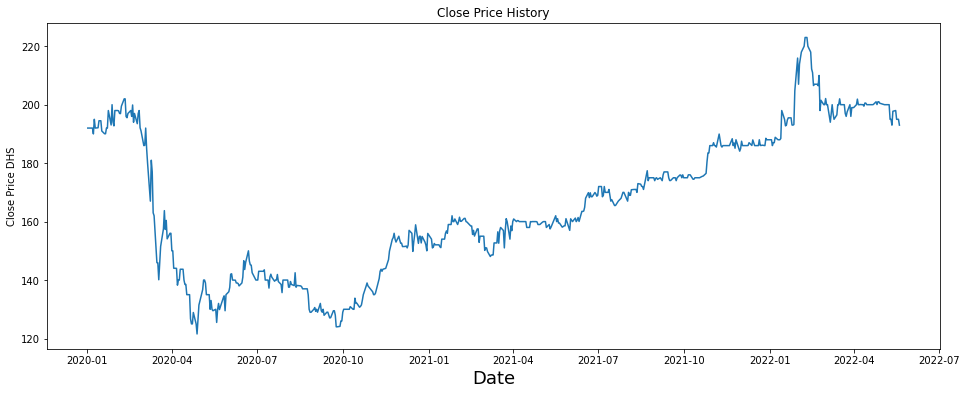

In [12]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Value'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price DHS', fontsize=10)
plt.show()

In [15]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Value'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .7 ))

training_data_len

418

In [16]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.69443075],
       [0.69443075],
       [0.69443075],
       [0.69443075],
       [0.67471661],
       [0.72400197],
       [0.69443075],
       [0.69541646],
       [0.71907344],
       [0.71907344],
       [0.71907344],
       [0.68457368],
       [0.67520946],
       [0.67520946],
       [0.69443075],
       [0.69443075],
       [0.75357319],
       [0.70478068],
       [0.77328733],
       [0.71463775],
       [0.70182356],
       [0.75357319],
       [0.75357319],
       [0.75258748],
       [0.74371612],
       [0.74322326],
       [0.7683588 ],
       [0.79300148],
       [0.79300148],
       [0.73336619],
       [0.72942336],
       [0.74371612],
       [0.75357319],
       [0.73385904],
       [0.77230163],
       [0.7141449 ],
       [0.74371612],
       [0.70921636],
       [0.74371612],
       [0.75357319],
       [0.69541646],
       [0.68506654],
       [0.63528832],
       [0.63627403],
       [0.69443075],
       [0.62543125],
       [0.57713159],
       [0.448

In [17]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.69443075, 0.69443075, 0.69443075, 0.69443075, 0.67471661,
       0.72400197, 0.69443075, 0.69541646, 0.71907344, 0.71907344,
       0.71907344, 0.68457368, 0.67520946, 0.67520946, 0.69443075,
       0.69443075, 0.75357319, 0.70478068, 0.77328733, 0.71463775])]
[0.7018235584031542]

[array([0.69443075, 0.69443075, 0.69443075, 0.69443075, 0.67471661,
       0.72400197, 0.69443075, 0.69541646, 0.71907344, 0.71907344,
       0.71907344, 0.68457368, 0.67520946, 0.67520946, 0.69443075,
       0.69443075, 0.75357319, 0.70478068, 0.77328733, 0.71463775]), array([0.69443075, 0.69443075, 0.69443075, 0.67471661, 0.72400197,
       0.69443075, 0.69541646, 0.71907344, 0.71907344, 0.71907344,
       0.68457368, 0.67520946, 0.67520946, 0.69443075, 0.69443075,
       0.75357319, 0.70478068, 0.77328733, 0.71463775, 0.70182356])]
[0.7018235584031542, 0.7535731887629373]



In [19]:
from traitlets.traitlets import ForwardDeclaredInstance
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout,GRU
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the GRU Block model
model = Sequential()

model.add(GRU(units=256,
                  return_sequences=True,
                  input_shape=(x_train.shape[1], 1),
                  recurrent_dropout=0.02,
                  recurrent_regularizer=regularizers.l2(1e-3)))
model.add(GRU(units=128,
                  #return_sequences=True,
                  recurrent_dropout=0.02,
                  recurrent_regularizer=regularizers.l2(1e-3)))
    #model.add(Dense(128,
    #              kernel_regularizer=regularizers.l2(1e-3)))
model.add(Dense(64, kernel_regularizer=regularizers.l2(1e-3)))
model.add(Dense(32, kernel_regularizer=regularizers.l2(1e-3)))

model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=64)

Epoch 1/100
50/50 [==============================] - 11s 123ms/step - loss: 0.3089
Epoch 2/100
50/50 [==============================] - 6s 122ms/step - loss: 0.1117
Epoch 3/100
50/50 [==============================] - 6s 123ms/step - loss: 0.0553
Epoch 4/100
50/50 [==============================] - 6s 123ms/step - loss: 0.0321
Epoch 5/100
50/50 [==============================] - 7s 146ms/step - loss: 0.0202
Epoch 6/100
50/50 [==============================] - 9s 190ms/step - loss: 0.0140
Epoch 7/100
50/50 [==============================] - 6s 123ms/step - loss: 0.0099
Epoch 8/100
50/50 [==============================] - 7s 148ms/step - loss: 0.0074
Epoch 9/100
50/50 [==============================] - 7s 135ms/step - loss: 0.0062
Epoch 10/100
50/50 [==============================] - 8s 155ms/step - loss: 0.0047
Epoch 11/100
50/50 [==============================] - 8s 150ms/step - loss: 0.0040
Epoch 12/100
50/50 [==============================] - 8s 165ms/step - loss: 0.0037
Epoch 13/100

In [20]:
# Create the testing data set
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 20: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


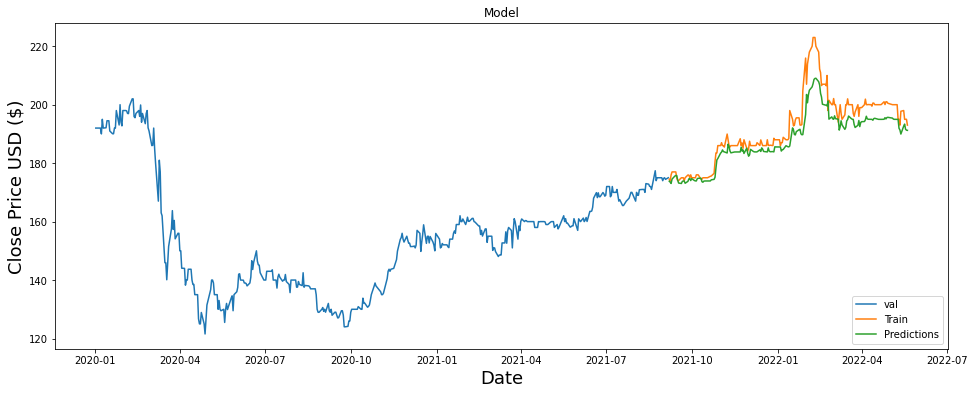

In [25]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Value'])
plt.plot(valid[['Value', 'Predictions']])


plt.legend(['val', 'Train', 'Predictions'], loc='lower right')
plt.show()

In [26]:
valid

,Value,Predictions
date,,
2021-09-07,174.5,173.830582
2021-09-08,174.0,173.502136
2021-09-09,176.0,173.050095
2021-09-10,177.0,174.542007
2021-09-13,177.0,175.574142
...,...,...
2022-05-16,198.0,192.663452
2022-05-17,195.0,193.357742
2022-05-18,195.0,191.624695


In [27]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((valid['Predictions']- valid['Value']) ** 2)))
mse = mean_squared_error(valid['Value'], valid['Predictions'])
print('MSE: '+str(mse))
  #mean absolute error
mae = mean_absolute_error(valid['Value'], valid['Predictions'])
print('MAE: '+str(mae))
  #root mean squared error
# rmse = math.sqrt(mean_squared_error(y_test, predictions))
print('RMSE: '+str(rmse))

MSE: 26.77234559721664
MAE: 3.9519585598720592
RMSE: 5.1741999958657034
